In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


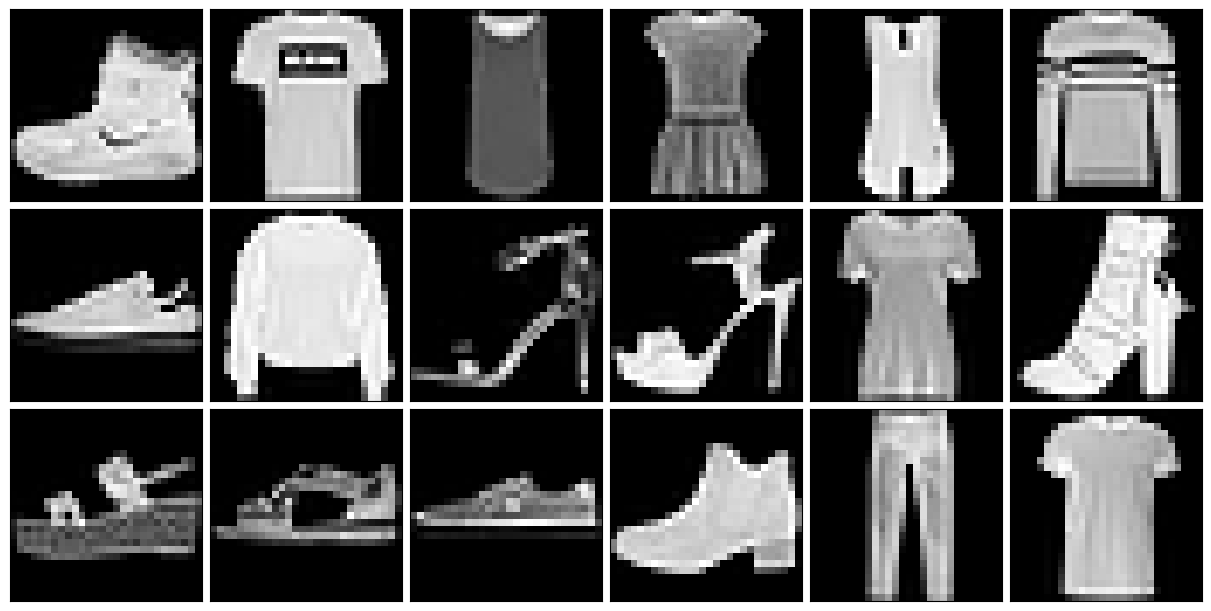

In [5]:
fig, ax = plt.subplots(3, 6, layout='constrained', figsize=(12, 6))
ax = ax.flatten()

for i in range(18):
    ax[i].imshow(X_train[i], cmap='grey', vmin=0, vmax=255)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [6]:
# X_valid, X_train = X_train[:5000] / 255, X_train[5000:] / 255
# y_valid, y_train = y_train[:5000], y_train[5000:]

In [7]:
X_train = X_train / 255

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
for i in range(len(model.layers)):
    print(model.layers[i].name)

flatten
dense
dense_1
dense_2


In [12]:
weights, biases = model.get_layer('dense').get_weights()

print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_split=0.1)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.6847 - loss: 0.9682 - val_accuracy: 0.8227 - val_loss: 0.5194
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.8274 - loss: 0.4999 - val_accuracy: 0.8232 - val_loss: 0.4817
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.8434 - loss: 0.4458 - val_accuracy: 0.8488 - val_loss: 0.4244
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.8550 - loss: 0.4174 - val_accuracy: 0.8350 - val_loss: 0.4494
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.8602 - loss: 0.4022 - val_accuracy: 0.8525 - val_loss: 0.4065
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.8654 - loss: 0.3810 - val_accuracy: 0.8650 - val_loss: 0.3722
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8725 - loss: 0.3623 - val_accuracy: 0.8688 - val_loss: 0.3681
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.8729 -

In [14]:
history.history

{'accuracy': [0.7636481523513794,
  0.8306851983070374,
  0.8458889126777649,
  0.8550740480422974,
  0.8628518581390381,
  0.8672592639923096,
  0.8717407584190369,
  0.8744259476661682,
  0.8791481256484985,
  0.882111132144928,
  0.8856481313705444,
  0.8877407312393188,
  0.8903703689575195,
  0.8916296362876892,
  0.8945184946060181,
  0.8960555791854858,
  0.899222195148468,
  0.8993703722953796,
  0.9030185341835022,
  0.9045740962028503,
  0.906166672706604,
  0.9084814786911011,
  0.9094444513320923,
  0.910611093044281,
  0.9134073853492737,
  0.9130740761756897,
  0.9150925874710083,
  0.9167407155036926,
  0.9184814691543579,
  0.9211481213569641],
 'loss': [0.7064214944839478,
  0.48611128330230713,
  0.4399724006652832,
  0.4130662679672241,
  0.39308419823646545,
  0.37724804878234863,
  0.36297714710235596,
  0.3517663776874542,
  0.3413912057876587,
  0.33119142055511475,
  0.3220568597316742,
  0.3139609396457672,
  0.30599042773246765,
  0.30013343691825867,
  0.2937

(0.0, 1.0)

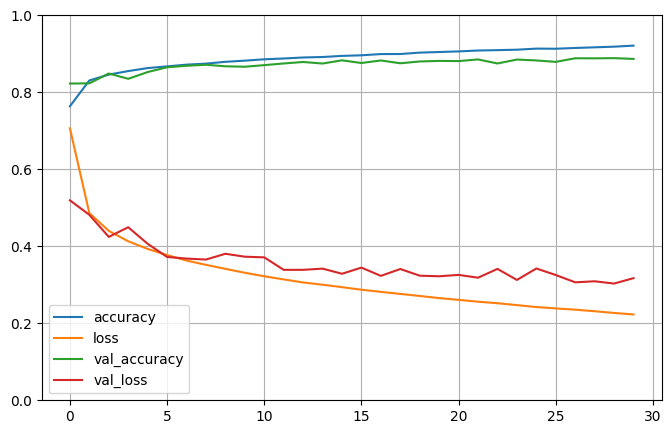

In [18]:
pd.DataFrame(data=history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [19]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8282 - loss: 79.7544


[83.1662826538086, 0.8271999955177307]

In [34]:
y_pred = model.predict(X_test[:15])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 4, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4], dtype=int64)

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

pred_names = np.array(class_names)[y_pred]
pred_names

array(['Ankle boot', 'Coat', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Bag',
       'Dress', 'Coat'], dtype='<U11')

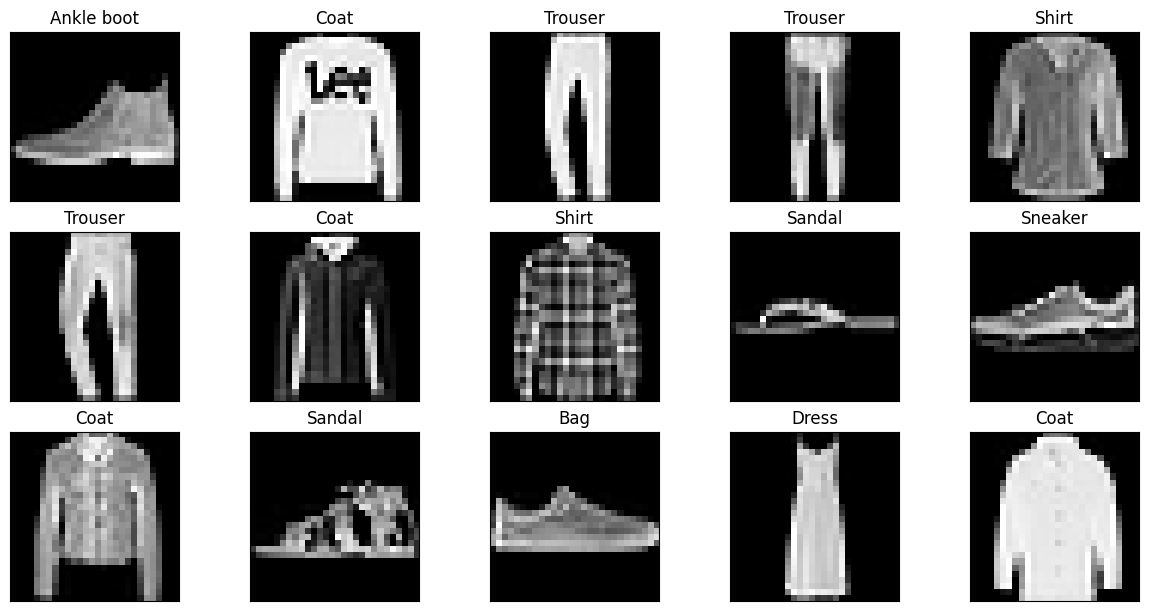

In [49]:
fig, ax = plt.subplots(3, 5, figsize=(12, 6), layout='constrained')
ax = ax.flatten()

for i in range(len(y_pred)):
    ax[i].imshow(X_test[i], cmap='grey')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(pred_names[i])

# NEW THINGS

In [ ]:
import torch
import torch.nn as nn

In [55]:
vector = torch.Tensor([[1, 2, 3],
                       [4, 5, 6], 
                       [-15, -7, -6]])
vector

tensor([[  1.,   2.,   3.],
        [  4.,   5.,   6.],
        [-15.,  -7.,  -6.]])

In [56]:
softmax_layer = nn.Softmax(dim=1)

probabilities = softmax_layer(vector)
probabilities

tensor([[9.0031e-02, 2.4473e-01, 6.6524e-01],
        [9.0031e-02, 2.4473e-01, 6.6524e-01],
        [9.0212e-05, 2.6892e-01, 7.3099e-01]])